In [187]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
from statsmodels.robust.scale import mad

In [188]:
world_population = pd.read_csv('/home/satire/PycharmProjects/World_population/csv/world_population.csv')
world_population

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


The mean is bigger than the trimmed mean, which is bigger than the median.

Mean

In [190]:
world_population['2022 Population'].mean()

np.float64(34074414.70940171)

Trimmed mean

In [191]:
trim_mean(world_population['2022 Population'], 0.1)

np.float64(11730380.058510639)

Median

* The sum of all the values divided by the number of values
$$
\text{Mean} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

In [192]:
world_population['2022 Population'].median()

np.float64(5559944.5)

Weighted mean
* It is calculated by multiplying each data value $$ {x_i} $$ and dividing their sum by the sum of the weights.



$$
\text{Weighted Mean} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}
$$

In [193]:
np.average(world_population['Growth Rate'], weights=world_population['2022 Population'])

np.float64(1.0084612707643672)

Weighted median
* The weighted median is a value such that the sum of the weights is equal for the lower and upper halves of the sorted list. The weighted median is robust to outliers.
$$
\text{Weighted Average} = \frac{\sum_{i=1}^{n} x_i \cdot w_i}{\sum_{i=1}^{n} w_i}
$$

In [194]:
wquantiles.median(world_population['Growth Rate'], weights=world_population['2022 Population'])

np.float64(1.006755382947228)

Standard Deviation
* The estimates of location and the observed data, showing how dispersed the data is around the central value.
$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

In [195]:
world_population['2022 Population'].std()

np.float64(136766424.80476278)

Interquantile Range
* Common measure of variability is the differnce between the 25th percentile and the 75th percentile, the interquartile range is the differnce between the two of them.
$$
\text{IQR} = Q_3 - Q_1
$$

In [196]:
world_population['2022 Population'].quantile(0.75) - world_population['2022 Population'].quantile(0.25)

np.float64(22056766.25)

* A robust estimate of variability is the median absolute deviation from the median.
$$
\operatorname{MAD} = \operatorname{median}(|X_i - \tilde{X}|)
$$

In [197]:
mad(world_population['2022 Population'])

np.float64(8121358.402270087)

* The standard deviation is almost twice as large as the median absolute deviation, also the standard deviation is sensitive to outliers.

Percentiles

In [198]:
world_population['Growth Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    0.994030
0.25    1.001775
0.50    1.007900
0.75    1.016950
0.95    1.030140
Name: Growth Rate, dtype: float64

Boxplots

In [199]:
max_score = world_population['2022 Population'].max()
print("Maximum score:", max_score)

Maximum score: 1425887337


Text(0, 0.5, '2022 Population Distribution')

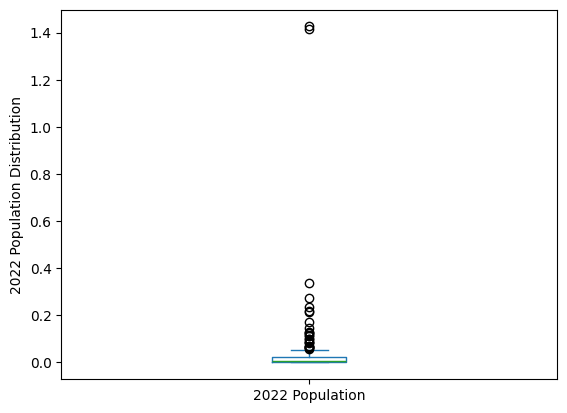

In [200]:
ax = (world_population['2022 Population']/1000000000).plot.box()
ax.set_ylabel('2022 Population Distribution')

* The median world population in 2022 was approximately 100.000.000.
* The data outside the whiskers are considered outliers.

* Frequency table and Histograms

In [201]:
segment_population = pd.cut(world_population['2022 Population'], 10)
segment_population.value_counts()

2022 Population
(-1425376.827, 142589192.7]     225
(142589192.7, 285177875.4]        6
(1283298654.3, 1425887337.0]      2
(285177875.4, 427766558.1]        1
(570355240.8, 712943923.5]        0
(427766558.1, 570355240.8]        0
(712943923.5, 855532606.2]        0
(855532606.2, 998121288.9]        0
(998121288.9, 1140709971.6]       0
(1140709971.6, 1283298654.3]      0
Name: count, dtype: int64

* There are at least 225 countries at the first range, which the width is equivalent to 142588682.7 for each of the 10 bins.

In [202]:
difference = 285177875.4 - 142589192.7
print(difference)

142588682.7


* This is the difference between the most populous country and the least one.

In [203]:
difference = 427766558.1 - 142589192.7
print(difference)

285177365.40000004


Text(0, 0.5, '2022 Population Distribution')

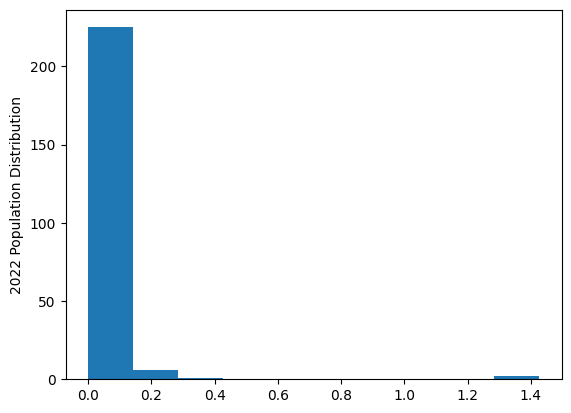

In [204]:
ax = (world_population['2022 Population']/ 1000000000).plot.hist(bins=10)
ax.set_ylabel('2022 Population Distribution')

Density Plots and estimates

Text(0.5, 0, 'Growth Rate')

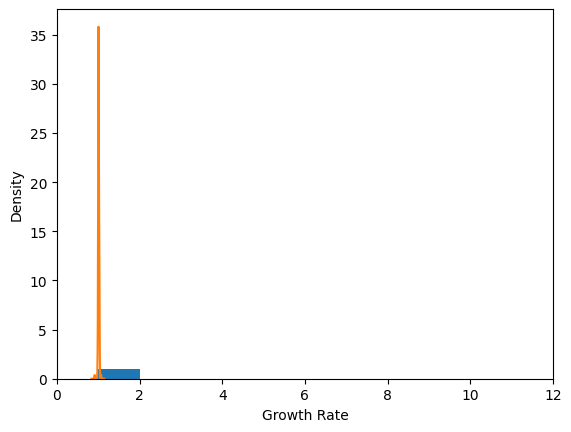

In [205]:
ax = world_population['Growth Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1, 12))
world_population['Growth Rate'].plot.density(ax=ax)
ax.set_xlabel('Growth Rate')

Binary and Categorical Data

In [206]:
world_population.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [207]:
largest_populations = world_population.sort_values(by='2022 Population', ascending=False)
top_5 = largest_populations.head(5)
top_5 = top_5.drop(['Rank', 'CCA3', 'Country/Territory',
                     'Capital', 'Continent', 'Area (km²)',
                     'Density (per km²)', 'Growth Rate',
                     'World Population Percentage'], axis=1)
top_5

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
41,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450
92,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301
221,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340
93,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394
156,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872


Text(0, 0.5, 'Count')

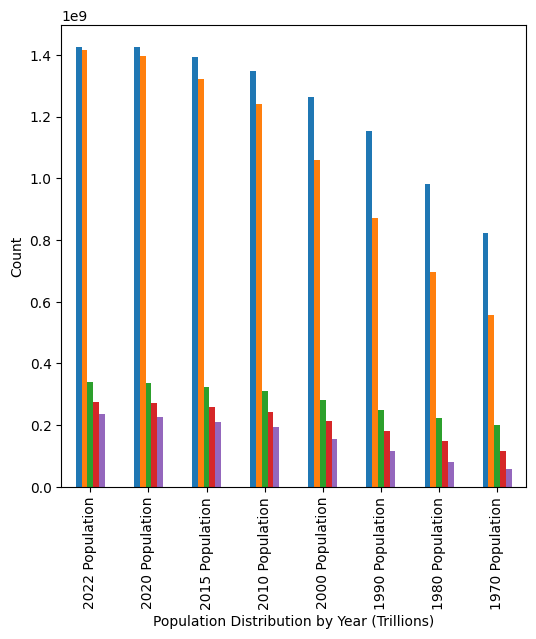

In [211]:
ax = top_5.transpose().plot.bar(figsize=(6,6), legend=False)
ax.set_xlabel('Population Distribution by Year (Trillions)')
ax.set_ylabel('Count')